In [1]:
# Importando bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [40]:
# Inicializando dataset e visualizando itens
df = pd.read_csv('credit_card_fraud_detection.csv')
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,T00001,U0001,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,T00002,U0002,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,T00003,U0003,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,T00004,U0004,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,T00005,U0005,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


In [10]:
# Criando função auxiliar para desenhar grafos
def criar_grafo(df, pais):
    grafo = nx.Graph()
    grafo.add_node(pais)

    # Inserindo vértices e arestas
    for i in range(len(df)):
        if df.iloc[i]['Country'] == pais:
            user_id = df.iloc[i]['User ID']
            transaction_amount = df.iloc[i]['Transaction Amount']
            grafo.add_node(user_id)
            grafo.add_edge(user_id, pais, weight=transaction_amount)

    # Retornando grafo
    return grafo

In [12]:
# Filtrando por dados fraudulentos e selecionando países
df_fraudulento = df[df['Fraudulent'] == 'Yes']
paises = df_fraudulento['Country'].unique()

In [ ]:
# Visualizando grafos
for pais in paises:
    grafo = criar_grafo(df_fraudulento, pais)
    
    # Dimensionando figura e ajustando cores
    plt.figure(figsize = (8, 4))
    cor = ['orange' if node == pais else 'teal' for node in grafo.nodes()]

    # Dando nome e visualizando grafo
    nx.draw(grafo, with_labels = True, node_color = cor, edge_color = "gray", font_size = 10, node_size = 500)
    plt.title(f"Fraudulent graphs in {pais}")
    plt.show()

In [ ]:
# Armazenando grafos
grafos = []
for pais in paises:
    grafos += [criar_grafo(df_fraudulento, pais)]
    print(criar_grafo(df_fraudulento, pais))

In [38]:
# Quantidade de fraudes em cada país com base no grau
for grafo in grafos:
    print(f"Grau do grafo {list(grafo.nodes)[0]}: {grafo.degree(list(grafo.nodes())[0])}")

Grau do grafo Australia: 13
Grau do grafo Brazil: 20
Grau do grafo USA: 22
Grau do grafo South Africa: 19
Grau do grafo Canada: 14
Grau do grafo France: 16
Grau do grafo Japan: 17
Grau do grafo Germany: 9
Grau do grafo UK: 18
Grau do grafo India: 13


In [ ]:
# Valor total de fraudes em cada país somando o peso das arestas
for grafo in grafos:
    peso_total = sum(nx.get_edge_attributes(grafo, 'weight')[edge] for edge in grafo.edges(list(grafo.nodes)[0]))
    print(f"Peso total no(a) {list(grafo.nodes)[0]}: {peso_total:.2f}")

Peso total no(a) Australia: 6733.98
Peso total no(a) Brazil: 8298.94
Peso total no(a) USA: 11254.51
Peso total no(a) South Africa: 9210.79
Peso total no(a) Canada: 5999.84
Peso total no(a) France: 7811.82
Peso total no(a) Japan: 9424.72
Peso total no(a) Germany: 4114.28
Peso total no(a) UK: 9219.07
Peso total no(a) India: 7795.29


In [ ]:
# Criando função auxiliar para desenhar grafo de perfil
def criar_grafo_perfil(df, pais):
    grafo = nx.Graph()
    grafo.add_node(pais)

    # Inserindo vértices e arestas
    for i in range(len(df)):
        if df.iloc[i]['Country'] == pais:
            if 18 <= df.iloc[i]['User Age'] < 30:
                if grafo.has_node('18/29'):
                    grafo['18/29'][pais]['weight'] += 1
                else:
                    grafo.add_node('18/29')
                    grafo.add_edge('18/29', pais, weight = 1)

            elif 30 <= df.iloc[i]['User Age'] < 40:
                if grafo.has_node('30/39'):
                    grafo['30/39'][pais]['weight'] += 1
                else:
                    grafo.add_node('30/39')
                    grafo.add_edge('30/39', pais, weight = 1)

            elif 40 <= df.iloc[i]['User Age'] < 50:
                if grafo.has_node('40/49'):
                    grafo['40/49'][pais]['weight'] += 1
                else:
                    grafo.add_node('40/49')
                    grafo.add_edge('40/49', pais, weight = 1)
                    
            elif 50 <= df.iloc[i]['User Age'] < 60:
                if grafo.has_node('50/59'):
                    grafo['50/59'][pais]['weight'] += 1
                else:
                    grafo.add_node('50/59')
                    grafo.add_edge('50/59', pais, weight = 1)

            elif 60 <= df.iloc[i]['User Age'] < 70:
                if grafo.has_node('60/69'):
                    grafo['60/69'][pais]['weight'] += 1
                else:
                    grafo.add_node('60/69')
                    grafo.add_edge('60/69', pais, weight = 1)

            elif 70 <= df.iloc[i]['User Age'] <= 80:
                if grafo.has_node('70/80'):
                    grafo['70/80'][pais]['weight'] += 1
                else:
                    grafo.add_node('70/80')
                    grafo.add_edge('70/80', pais, weight = 1)

        

    # Retornando grafo
    return grafo

In [50]:
# Paises com mais fraudes (em relação a quantidade e valor)
paises_mais_fraudados = ['USA', 'Brazil', 'Japan']

# Criando grafos de perfil
grafos_perfil = []
for pais in paises_mais_fraudados:
    grafos_perfil += [criar_grafo_perfil(df_fraudulento, pais)]
    print(criar_grafo_perfil(df_fraudulento, pais))

Graph with 7 nodes and 6 edges
Graph with 7 nodes and 6 edges
Graph with 7 nodes and 6 edges


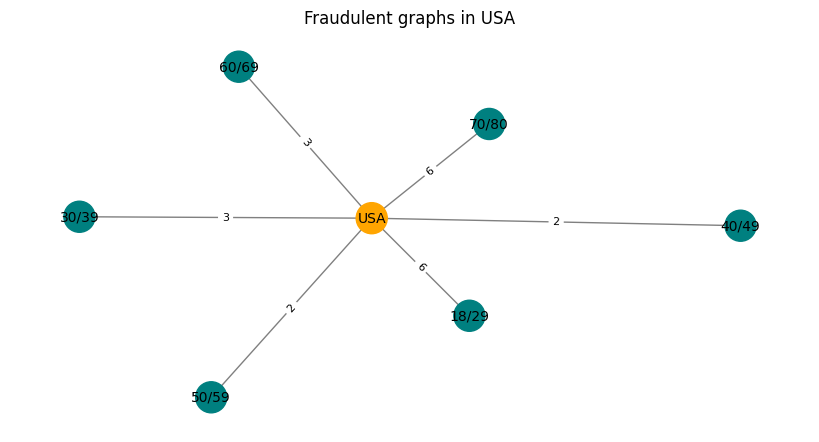

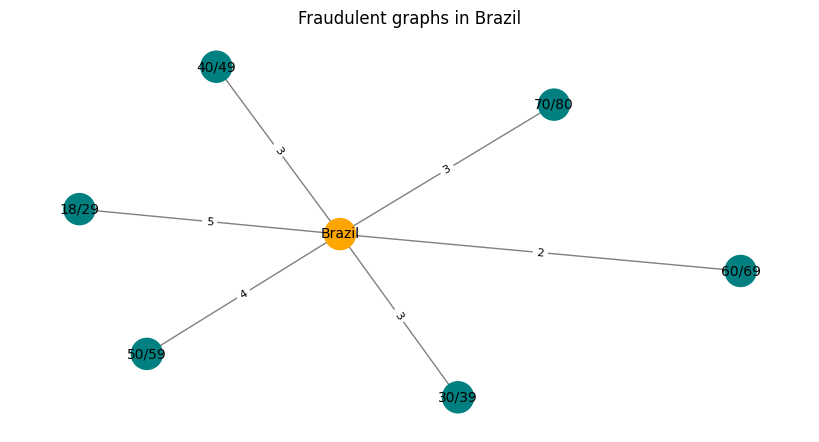

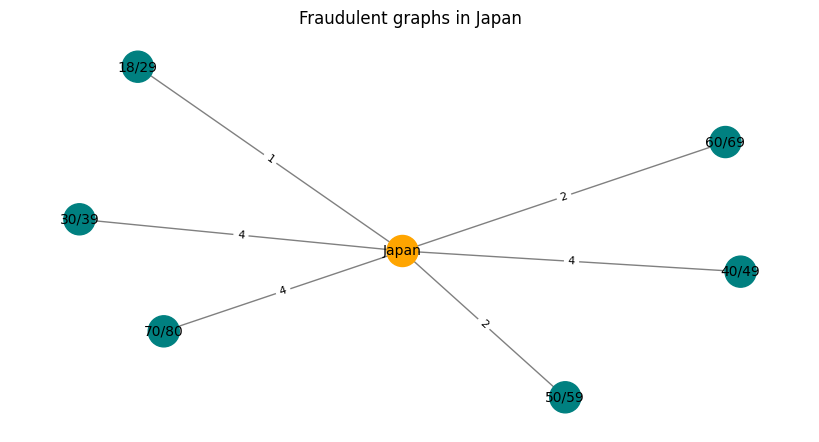

In [53]:
# Visualizando grafos de perfil
for pais in paises_mais_fraudados:
    grafo = criar_grafo_perfil(df_fraudulento, pais)
    
    # Dimensionando figura e ajustando cores
    plt.figure(figsize=(8, 4))
    cor = ['orange' if node == pais else 'teal' for node in grafo.nodes()]
    
    # Criando um dicionário com os pesos das arestas
    labels = nx.get_edge_attributes(grafo, 'weight')

    # Dando nome e visualizando grafo
    pos = nx.spring_layout(grafo)  # Calcula a posição dos nós
    nx.draw(grafo, with_labels=True, node_color=cor, edge_color="gray", font_size=10, node_size=500, pos=pos)
    
    # Desenhando os rótulos das arestas no meio
    nx.draw_networkx_edge_labels(grafo, pos=pos, edge_labels=labels, font_size=8)
    
    plt.title(f"Fraudulent graphs in {pais}")
    plt.show()